# 1. Predictions in Neural Networks
In the past we have looked at both logistic regression and binary classification. There, we would collect some data, and then try to predict 1 of 2 possible labels. For example, if we were dealing with an e-commerce stie, we could collect _**time spent on site**_ and _**number of pages viewed**_, and then try to predict whether someone is going to buy something on the site. 

In this case, we only have 2 dimensions. We will plot the information, and then try to use a straight line to classify the classes (buy or not buy):

$$\sigma \big( w_1*(\text{time spent on site}) + w_2 (\text{number pages viewed})\big)$$

If we are able to find a line that goes between the classes, they are _linearly seperable_. When we are dealing with data that is linearly seperable, logistic regression is fine, since it is a linear classifier. So, in 2 dimensions linearly seperable data can be separated via a line, in 3 dimensions a plane, and and 4+ dimensions a hyperplane. The point is, no matter how many dimensions we are dealing with, our decision boundary is going to be straight, not curved. 

## 1.1 Neural Networks Add Non-linearity
Now, as we get into the realm of Neural Networks, things begin to change. We can have non-linearly seperable variables, such as: 

<img src="https://drive.google.com/uc?id=1tnYYowauWYZc_6Gfr65rvgQy276RX30u" width="400">

Logistic regression would _not_ be appropriate for this, while neural networks would! Recall, a linear function has the form:

$$w_1x_1 + w_2x_2+...+w_nx_n$$

$$w^T x$$

Where, just a reminder, in the vector notation $w_T x$, the weights are transposed because by convention they are stored as a column vector, but we need to be able to perform matrix vector multiplicaton (akin to the dot product in this case) with the input vector $x$. 

So, we can see that anything that cannot be simplified into $w^Tx$ is nonlinear. Now, $x^2$ and $x^3$ are both nonlinear, but neural networks are nonlinear in a _very specific way_. Neural Networks achieve nonlinearity by:

> _Being a combination of multiple logistic regression units (neurons) put together._

That is going to be the focus of this section; determining how we can build a nonlinear classifier (in this case a neural network), by combining logistic regression units (neurons). We will then use this nonlinear classifier to make _**predictions**_

---

# 2. Logistic Regression $\rightarrow$ Neural Networks
We are now ready to start the transition from logistic regression to neural networks. Recall that logistic regression is a neuron, and we are going to be connecting many together to make a network of neurons. The most basic way to do this is the _**feed forward method**_. For logistic regression, we have a weight corresponding to every input:

<img src="https://drive.google.com/uc?id=1M8tztc_pcFzl5um_YJr2HsfkJtIo5No7" width="500">

This is seen clearly in the image above. We have two input features, $x_1$ and $x_2$, but of course there can be many more. Each input feature has a corresponding weight, $w_1$ and $w_2$. In order to determine the output $y$, we multiply each input by its weight, sum them all together, add a bias term, and put it through a sigmoid function:

$$z = x_1w_1 + x_2w_2 + bw_0$$

$$y = p(y \mid x) = \frac{1}{1 + e^{-z}}$$

$$prediction = round \big( p(y \mid x)\big)$$

If our prediction is greater than 0.5, we predict class 1, otherwise we predict class 0.

## 2.1 Extend to a Neural Network
Now, in order to extend this concept to that of a neural network, the main thing we need to do is just add more logistic regression layers (i.e. neurons):

<img src="https://drive.google.com/uc?id=1eb0SZPcqbpfQB6RssWTD0ZVfZyBH-32i" width="500">

We will be working mainly with 1 extra layer, but an arbitrary number can be added. In recent years, researchers have found amazing success with deeper networks, hence the term _deep learning_. The first step is of course to just add 1 layer, and our calculations are the exact same! 

> We multiply each input by its weight (linear combination), add the bias, and pass it through a sigmoid function. 

That is how we get each value at node $z$:

$$z_j = \sigma \big(\sum_i (W_{ij}x_j + b_j)\big)$$

Where in the above equation our $x$ inputs are indexed by $i$, and the $z$ nodes are indexed by $j$. Also, notice that our set of weights $w$ is now a matrix. This is because there needs to be a weight for each input-output pair. Hence, since we have 2 inputs and 3 outputs, we need there to be 6 weights in total. 

## 2.2 Nonlinearities
We have already spoken about the fact that the main things that makes neural networks so powerful is that they are nonlinear classifiers. We have already gone over one of the most common nonlinear functions utilized in this architecture, the sigmoid:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

There are also several other nonlinearities that we will cover soon, such as _tanh_ and the _RELU_. 

## 2.3 Vectorization
From an implementation standpoint, remember that it is faster to use the numpy matrix and vector operations, compared to using python for loops. Hence, we are going to treat our system layers as follows:

> * $X$ is going to be a **_D dimensional vector_** (D is 2 in the above diagram)
* $Z$ is going to be an **_M dimensional vector_** (M is 3 in the above diagram)

This means that Z is going to look like: 

$$z_j = \sigma \big(\sum_i (W_{ij}x_i) + b_j\big)$$

$$\downarrow$$

$$z_j = \sigma \big(W_{j}^Tx) + b_j\big)$$

$$\downarrow$$

$$z = \sigma \big(W^Tx) + b\big)$$

And $p(y \mid x)$ will look like:

$$p(y \mid x) = \sigma \big(\sum_j (v_{j}z_j) + c\big)$$

$$\downarrow$$

$$p(y \mid x) = \sigma \big(v^Tz + c\big)$$

## 2.4 Matrix Notation
The above is pretty good, but we can do even better! In general, we have _many_ data points, and we want to consider more than one sample at a time. So, we can further vectorize our calculations, by using the full input matrix of data! 

This will be an $NxD$ matrix, where $N$ is the number of samples and $D$ is the dimensionality. Because we will then be calculating everything at the same time, $z$ will then be an $NxM$ matrix. The output $y$ will be an $Nx1$ matrix (for binary classification, for $k$ classes it will be $Nxk$. It is important that our weights all have the correct shape. Hence:

> **Weights:**
* $W$ is $DxM$
* The first bias, $b$ is $Mx1$
* The output weight $v$ is an $Mx1$ vector
* The output bias $c$ is a scalar

Visually, our current configuration can be interpreted as seen in the diagram below:

<img src="https://drive.google.com/uc?id=1EKIR1mZVB4AQQgDf8GPx1b6e_Z8poEuE" width="600">

And after switching to a matrix representatino, we end up with the following equations:

$$Z = \sigma \big(XW + b\big) $$

$$Y = \sigma \big(Zv + c\big)$$

## 2.5 Intuition Via the Dot Product
Now, when just learning about Neural Networks, it is _very_ easy to become lost in a fog of matrices, arrows pointing from node to node, transposes, and so on. Something that I feel is absolutely crucial to really have a good understanding for what is going on here is having a good understanding of the _**dot product**_, and being able to keep it in mind as we get into more complex networks. 

I have a notebook that delves into the dot product, linear combinations, and linear transformations in great detail in my _linear algebra_ section of the Math Appendix. I highly recommend reviewing it if you are a bit hazy on the dot product, but I will give a quick overview here as well. 

Consider for a moment that our $x$ input is a _vector_. We have been representing it simply via an array of numbers, but we can think about it _geometrically_ as well. This is of course only possible in 3 dimensions, since humans cannot think in any dimensionality larger than that, but for now let's assume that $x$ is a 3 dimensional vector. Now, if we have another 3 dimensional vector, $v$, and take the dot product of it with $x$:

$$x \cdot v$$

We are essentially getting a measure of _similarity_. The closer these two vectors are in direction and magnitude, the _larger their dot product_. If they are perpendicular to eachother, their dot product is 0. If they are pointing in opposite directions, their dot product is negative. 

Now, in both the our logistic regression unit (neuron) and neural networks, we are taking dot products! (In both cases, we start with simply taking a linear combination, but after transitioning to matrix vector notation we are able to refer to it as a dot product). This can be seen clearly in the diagram below:

<img src="https://drive.google.com/uc?id=1KRmrETJeFRnxTcaDWAY74QTJx7S5TYRk" width="500">

Let's walk through what is happening above:
> * We have an $X$ matrix as our input, but for now we are only focusing on the first row (which we can think of as a row vector)
* This row vector of $X$, seen in the green box, then multiplied (via the dot product) by the first column in the weight matrix $W$. Technically this is matrix vector multiplication of a 1x3 matrix by a 3x1 vector, but based on _duality_ if functions in the same fashion as the dot product. 
* This dot product results in _a single value_, $z_1$, the first node in the matrix $Z$. 

Now that the mechanics of the above process have been outlined, consider this: We know that the weights will eventually need to be _learned_. We don't know how to do this yet, but we know that that is coming up. Assume that they have been learned. What does the first column of $W$ represent? It is a learned representation of the first node of $Z$! From a high level we can view this as follows:

> * Input a single sample, and vector $x$. 
* In order to calculate the value of $z_1$ (the first node in $Z$), take the dot product with the first column of the weight matrix, $W$.
* $z_1$ will be large when the vector $x$ and the first column of $W$ are _similar_! And it will be negative when they are very different (geometrically). 
* Hence, a way to think about the learned weights of the first column in $W$ is that they are meant to be a vector represenation of $z_1$. 

This is a pretty powerful way of viewing something that can so frequently be incredibly abstract. If it is still slightly confusing, the diagram below should help:

<img src="https://drive.google.com/uc?id=1udm1_97iIlV1DJBbpM1gTBr-YhX3Rmu5" width="500">

Above we have the _hidden layer_ to the _output layer/node_. This is no different than the simple logistic neuron, and we can even think of the hidden layer as the input layer if it helps simplify things. Here, again we have 3 nodes in the first row of $Z$, that are being multiplied via $V$. This will give us a prediction. Now, if the result of the dot product between the first row of $Z$ and $V$ is large, then the value of our output node (which is representing class 1), will be large after going through the sigmoid function, and we will predict class 1. _If_ the dot product ends up being negative, then we will predict class 0. 

This means that our $V$ matrix can be thought of as a learned representation of class 1! Now, this of course loses meaning as we add layers and different components to our network, particularly the nonlinearities introduced by the sigmoid/RELU. But it is still a useful intuiton to have, making use of the underlying geometry of the system!

---

# 3. Softmax
It is now time to dig into handling the scenario when your output has more than 2 categories. Previously, we have only discussed binary classification, for which there _are_ many real world applications. However, there are countless situations where you want to be able to classify $k$ classes. For instance, consider the famous MNIST data set, or if you wanted to tag Faces, cars, friends, etc. 

## 3.1 Extending the Logistic Unit
Let's quickly talk about the best way to extend the logistic unit so that it can handle more than 2 classes. Recall that when we have two classes, we only need 1 output: 

$$P(Y=1\mid X)$$

This is because:

$$P(Y=0 \mid X) = 1 - P(Y=1 \mid X)$$

This can be visualized below:

<img src="https://drive.google.com/uc?id=1IEL1fu9RSWXkPaXwnpOs3ML_ooGVDIjs" width="400">

Where again we can think of the weight vector $W$ as a learned representation of the $Y=1$ vector! When we take the dot product with our input vector $x$, if the input vector is similar, we have a high value and classify the vector as 1. 

However, there is another way that we could go about doing this.

### 3.1.1 Binary Output With Two Output Nodes
Instead of having a single output node, we could have two nodes, and then just normalize them so that they sum to 1. For instace, the diagram below:

<img src="https://drive.google.com/uc?id=1kpWAJtsHVNsXxklPnufR9kmWK55HKqrZ" width="400">

We have $a_1$ and $a_2$, where they are just:

$$a_1 = w_1^T x$$

$$a_2 = w_2^T x$$

We can exponentiate both of the output values ($a_1$ and $a_2$) in order to make sure they are both positive. 

$$P(Y=1 \mid X) = \frac{e^{a_1}}{e^{a_1} + e^{a_2}}$$

$$P(Y=0 \mid X) = \frac{e^{a_2}}{e^{a_1} + e^{a_2}}$$

Notice in the diagram that our weights are no longer a vector as they were in logistic regression. Since every input node has to be connected with every output node, and we have $D$ input nodes and 2 output nodes, the total number of weights is $2D$ and they are stored in a $Dx2$ matrix. 

## 3.2 Softmax for $K$ Classes
We can easily extend this framework to $K$ classes:

$$P(Y=k \mid X) = \frac{e^{a_k}}{Z}$$

$$Z = e^{a_1} + e^{a_2} + ... + e^{a_k}$$

And $W$ is a $DxK$ matrix. Note, the output which we have been calling $a$ is usually the activation.

## 3.3 Sigmoid vs. Softmax
Let's take a moment to determine when the sigmod and softmax are equivalent. We can begin by restating what we already know:

$$P(Y=1 \mid X) = \frac{e^{w_1^Tx}}{e^{w_1^Tx} + e^{w_0^Tx}}$$

$$P(Y=0 \mid X) = \frac{e^{w_0^Tx}}{e^{w_1^Tx} + e^{w_0^Tx}}$$

Now, let's divide the first equation, $P(Y=1 \mid X)$, by $e^{w_1^Tx}$:

$$P(Y=1 \mid X) = \frac{1}{1 + e^{(w_0 - w_1)^Tx}}$$

And we can see that this has the same form as the sigmoid! Now, in this case $w = w_1 - w_0$. What does this mean? This means that having 2 weights is actually redundant when there are only two classes. However, from a software design perspective, it is safer to always just use softmax, since that will allow it to be more general! It will be able to handle the sigmoid case where $K=2$, but also any other value of $K$. 

---

# 4. Feed-Forward Example
We are now ready to make our first predictions via a Neural Network! The way that this is done is via the _**Feedforward method**_. Here is the scenario we will go over:

> * We have training data that consists of inputs, $X$, and targets, $Y$.
* We will have 3 training examples, $N = 3$, and two dimensions, $D=2$
* Our $X$ examples will look like:
$$X = \begin{bmatrix}
    0 & 3.5 \\
    1 & 2 \\
    1 & 0.5 
\end{bmatrix}$$
* And our $Y$ output classes will be:
$$Y = \begin{bmatrix}
    1 \\
    1 \\
    0  
\end{bmatrix}$$
* First we are going to consider binary classification, and then move on to softmax.
* Our targets, $Y$, are not used during prediction, only in training. That will be covered in the next section. 
* The rows of $X$ represent different samples (in this case they are people), and we are trying to predict whether or not each person will succeed at studying deep learning. The first column of $X$ represents if the subject has a technical degree, and the second column represents the number of hours they spend studying per day. Note, has a technical degree is a binary feature, 1 if true, 0 if false

## 4.1 Neural Network Structure
The structure of our neural network will be as follows:

<img src="https://drive.google.com/uc?id=1SKmYeR0msxifh8ehUmoohZa4Ru7_yrqI" width="500">

Where we have an input of size two, because we have two input features. The output size is fixed to 1 because we have 1 binary output prediction. The output is going to predict the probability that the subject succeeds at deep learning. Our hidden layer is of size 3. You may ask, why is that? Well, it is rather advanced, and we will cover the reasoning for that later on. 

We can now add in the weights for our network:

<img src="https://drive.google.com/uc?id=114mXlNUhZC-IPHt2XdLoB-fA2EumA1YD" width="500">

Which can be written as a matrix of size $2x3$:

$$W = \begin{bmatrix}
    W_{11} & W_{12} & W_{13}\\
    W_{21} & W_{22} & W_{23}\\
\end{bmatrix}$$

And for our case, our weights will have the values:

$$W = \begin{bmatrix}
    0.5 & 0.1 & -0.3\\
    0.7 & -0.3 & 0.2\\
\end{bmatrix}$$

The first row of $W$ corresponds to the weights that relate $x_1$ to the hidden layer, and the second row of $W$ corresponds to the weights that relate $x_2$ to the hidden layer. 

Our bias terms can be held in a $3x1$ vector $b$:

$$b = \begin{bmatrix}
    b_1 \\
    b_2 \\
    b_3 
\end{bmatrix}$$

With values:

$$b = \begin{bmatrix}
   0.4 \\
   0.1 \\
   0 
\end{bmatrix}$$

We can now look at the hidden weights as well, where $V$ maps each node in the hidden layer to every output node (currently, we have 1 output node). Hence, with 3 hidden layer nodes, we need 3 weights: 

$$V = \begin{bmatrix}
    V_1 \\
    V_2 \\
    V_3 
\end{bmatrix}$$

$$V = \begin{bmatrix}
    0.8 \\
    0.1 \\
    -0.1 
\end{bmatrix}$$

We can also specify a bias term, which we need on per output node. In this case, with a only one output node, our bias term can be a scalar:

$$c = 0.2$$

## 4.2 Calculations $\rightarrow$ Via Summations
Alright, now that we have all of our values defined and sorted out, we can take the first sample and walk through a calculation trying to solve whether the person will succeed at deep learning or not. In other words, we are going to find $p(y =1 \mid x)$!

At first, we are going to calculate this using summations, and also use the tanh activation function. We could have also used the sigmoid-we will discuss our choice later. 

### 4.2.1 Calculate $z_1$, the activation at hidden layer unit 1
From a visual perspective, the activation at unit 1 in the hidden layer looks like: 

<img src="https://drive.google.com/uc?id=17BI0sgBmIxqMUN-vl7zSGEH0tbElChEm" width="500">

The activation is a linear combination of all input features values, $x$, and their corresponding weights. This linear combination is then used as the input to the tanh function, and the result is our activation:

$$z_1 = tanh(x_1w_{11} + x_2w_{21} + 1*b_1)$$

$$z_1 = tanh(0.5*0 + 0.7*3.5 + 0.4) = tanh(2.85) = 0.993$$

### 4.2.2 Calculate $z_2$, the activation at hidden layer unit 2
This same process can be followed for $z_2$:

<img src="https://drive.google.com/uc?id=1T7Buib9lNcjT8ZjJ6f6NsXzXg8K_j__3" width="500">

$$z_2 = tanh(x_1w_{12} + x_2w_{22} + 1*b_2)$$

$$z_2 = tanh(0.1*0 - 0.3*3.5 + 0.1) = tanh(-0.95) = -0.740$$

### 4.2.3 Calculate $z_3$, the activation at hidden layer unit 3
And again, for $z_3$:

<img src="https://drive.google.com/uc?id=1Xpv2gueNe1YM0p5rybkAY-gu4a4h8BaO" width="500">

$$z_3 = tanh(x_1w_{13} + x_2w_{23} + 1*b_3)$$

$$z_3 = tanh(-0.3*0 + 0.2*3.5 +0) = tanh(0.7) = 0.604$$

### 4.2.4 Hidden layer activations, $z_i$, with summations
It is important to note that we can rewrite our equations for the activations in the hidden layer via summations, like so:

$$z_1 = tanh\big(\sum_{i=1}^2 W_{i1}x_i + b_1\big)$$

$$z_2 = tanh\big(\sum_{i=1}^2 W_{i2}x_i + b_2\big)$$

$$z_3 = tanh\big(\sum_{i=1}^2 W_{i3}x_i + b_3\big)$$

Now, at this point, we have determined all of the activations, $z$, for the hidden layer! 

### 4.2.5 Calculate Output, $p(Y=1 \mid X)$
At this point we would like to calculate the output, $p(Y=1 \mid X)$. In other to do this, we need to multiply our hidden layer by $V$, add $c$, and run that value through the sigmoid function. Just as with the input to hidden weights, each of the Vs also connects 1 node in the hidden layer to the output node. So, visually our calculation looks like:

<img src="https://drive.google.com/uc?id=1Tz_7d6rMz_ED0hCL6yMJ1n9P2bcCFxXl" width="500">

And it can be written mathematically as:

$$p(Y=1 \mid X) = \sigma \big( V_1z_1 + V_2z_2 + V_3z_3 + c\big)$$

Or, via summations as:

$$p(Y=1 \mid X) = \sigma \big(\sum_{j=1}^3 V_jz_j + c \big)$$

Which we can then plug in the known values for those variables:

$$p(Y=1 \mid X) = \sigma \big(0.8*0.993 + 0.1*-0.74 - 0.1*0.604 + 0.2\big)$$

$$p(Y=1 \mid X) = \sigma \big(0.86\big) = 0.70$$

### 4.2.6 Our Prediction
After the succession of calculations, we finally arrive at our prediction:

> Our subject has a 70% chance of succeeding at deep learning!

## 4.3 Calculations $\rightarrow$ Vectorized
Now, that was a lot of work to calculated just one sample, which is why we want to vectorize our operations, via _numpy_.

### 4.3.1 Hidden layer, $z$, vectorized
We can start by vectorizing the hidden layer. Recall, the hidden layer is determined via:


$$z_1 = tanh\big(\sum_{i=1}^2 W_{i1}x_i + b_1\big)$$

$$z_2 = tanh\big(\sum_{i=1}^2 W_{i2}x_i + b_2\big)$$

$$z_3 = tanh\big(\sum_{i=1}^2 W_{i3}x_i + b_3\big)$$

Which, we can rewrite as follows:

$$
\begin{bmatrix}
    z_1\\
    z_2  \\
    z_2 
\end{bmatrix} = 
tanh \Big (
\begin{bmatrix}
    W_{11} & W_{21} \\
    W_{12} & W_{22} \\
    W_{13} & W_{23} 
\end{bmatrix}
\begin{bmatrix}
    x_1 \\
    x_2 \\
\end{bmatrix} +
\begin{bmatrix}
    b_1 \\
    b_2 \\
    b_3
\end{bmatrix}
\Big)
$$

Which can be written compactly as:

$$
\begin{bmatrix}
    z_1\\
    z_2  \\
    z_2 
\end{bmatrix} = 
tanh (W^Tx+b)
$$

Now, just to prove that that matrix notation is equivalent, we can quickly perform the calculation via numpy:

In [1]:
import numpy as np
x = np.array([0,3.5]).reshape(2,1)
W = np.array([[0.5, 0.1, -0.3],[0.7, -0.3, 0.2]])
b = np.array([0.4, 0.1, 0]).reshape(3,1)
W_transpose = np.transpose(W)
print('x vector: \n', x)
print('W Matrix: \n', W)
print('b vector: \n', b)
print('W transpose matrix: \n', W_transpose)

# Perform Calculation
z = np.tanh(W_transpose.dot(x) + b)
print('z vector: \n', z)

x vector: 
 [[0. ]
 [3.5]]
W Matrix: 
 [[ 0.5  0.1 -0.3]
 [ 0.7 -0.3  0.2]]
b vector: 
 [[0.4]
 [0.1]
 [0. ]]
W transpose matrix: 
 [[ 0.5  0.7]
 [ 0.1 -0.3]
 [-0.3  0.2]]
z vector: 
 [[ 0.99333039]
 [-0.73978305]
 [ 0.60436778]]


And we have arrived at our expected answer! 

### 4.3.2 Output layer vectorized
Of course, we can do the exact same thing for the hidden to output layer! Our calculation with summations had the form:

$$p(Y=1 \mid X) = \sigma \big(\sum_{j=1}^3 V_jz_j + c \big)$$

And we can vectorize it so that it looks like:

$$p(Y=1 \mid X) = \sigma \big(V^Tz +c)$$

Which, when written out fully will look like:

$$
p(Y=1 \mid X) = 
\sigma \Big (
\begin{bmatrix}
    V_1 & V_2 & V_3 \\
\end{bmatrix}
\begin{bmatrix}
    z_1 \\
    z_2 \\
    z_3
\end{bmatrix} +
0.2
\Big)
$$

Again, we can verify that this operation is equivalent to our summation calculation from earlier:

In [2]:
# V starts as column vector by convention
V = np.array([0.8, 0.1, -0.1]).reshape(3,1)  
V_transpose = np.transpose(V)
c = 0.2

# Define sigmoid
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Calculation
sigmoid(V_transpose.dot(z) + c)

array([[0.70271272]])

And we arrive out the exact output we were expecting! 

## 4.4 Multiple Sample $\rightarrow$ Matrixization
At this point we have effectively vectorized the prediction of a single sample. However, in general we may have _a set of samples_ that we want to classify. We are able to take our vectorization process one step further and create an _input matrix_, $X$, of samples. 

Keep in mind that when we are dealing with a single input sample, $x$, it is a column vector; however, once we switch to deal with a matrix of input samples, by convention they are held as row vectors. In other words, when dealing with a single sample we have:

$$x = \begin{bmatrix}
    0 \\
    3.5
\end{bmatrix}$$

And when dealing with multiple samples:

$$X = \begin{bmatrix}
    0 & 3.5 \\
    1 & 2 \\
    1 & 0.5 
\end{bmatrix}$$

So, we want to find a way to pass in _an entire input matrix_, $X$, to our prediction process! This means that we will no longer be calculating a $z$ hidden layer vector, but a $Z$ hidden layer matrix. Likewise, we will not longer be determining a single output, but rather a vector holding a prediction for each corresponding row of the input matrix.

To do this, we must first consider that our input samples are now _rows_ in $X$:

$$X = \begin{bmatrix}
    0 & 3.5 \\
    1 & 2 \\
    1 & 0.5 
\end{bmatrix}$$


In order to ensure that our hidden layer is still calculated correctly we must make an update. Previously, we had been taking the tranpose of our weight matrix:

$$W^T =
\begin{bmatrix}
    W_{11} & W_{21} \\
    W_{12} & W_{22} \\
    W_{13} & W_{23} 
\end{bmatrix}
$$

However, that is no longer what we want to do, since our samples are rows of $X$, and not single column vectors. Hence, we want to keep $W$ in its original form:

$$W = \begin{bmatrix}
    W_{11} & W_{12} & W_{13}\\
    W_{21} & W_{22} & W_{23}\\
\end{bmatrix}$$

And have it be multipled (linearly transformed) by $X$:

$$XW =
\begin{bmatrix}
    0 & 3.5 \\
    1 & 2 \\
    1 & 0.5 
\end{bmatrix}
\begin{bmatrix}
    W_{11} & W_{12} & W_{13}\\
    W_{21} & W_{22} & W_{23}\\
\end{bmatrix}
$$

Now, the next step is determining if/how our bias vector, $b$, must be updated. $b$ is of size $Mx1$, and looks like:

$$b = \begin{bmatrix}
    b_1 \\
    b_2 \\
    b_3 
\end{bmatrix}$$

However, the operation $XW$, leaves us with an $NxM$ matrix. Because matrix addition is element wise, when you add two matrices together they must be the same size. So, doing $XW + b$ does not work anymore! 

We know that what should happen is that the bias, $b$, should be applied to all $N$ input samples. For that to happen, we need to transpose $b$ so that it is a horizontal row vector, and then repeat it $N$ times. That would give us an $NxM$ matrix, and we would have two $NxM$ matrices that we could add together!

$$
XW_{NxM} + \begin{bmatrix}
    \leftarrow b^T  \rightarrow \\
    \leftarrow b^T \rightarrow \\
    \leftarrow b^T \rightarrow 
\end{bmatrix}
$$

Luckily, numpy does now enforce that we do this explicitly and will automatically apply the process when call: 

```
X.dot(W) + b
```

So, our matrixization currently has gotten us to:

$$XW + b$$

Because the sigmoid and $tanh$ functions are applied element-wise, you pass scalars, vectors, and matrices in legally. This means that we can pass the entire expression above into $tanh$, like so:

$$tanh(XW + b)$$

The resulting matrix from this process, $Z$ (which holds the activations of all hidden units for each input sample), has a shape $NxM$:

$$tanh(XW + b) = Z = 
\begin{bmatrix}
    Z_{11} & Z_{12} & Z_{13}\\
    Z_{21} & Z_{22} & Z_{23}\\
    Z_{21} & Z_{22} & Z_{23}\\
\end{bmatrix}
$$

If we recall, $V$ has a shape $Mx1$. Hence, in order to keep consistency and ensure our calculations remain accurate, we must update our multiplcation operation to be:

$$ ZV = 
\begin{bmatrix}
    Z_{11} & Z_{12} & Z_{13}\\
    Z_{21} & Z_{22} & Z_{23}\\
    Z_{21} & Z_{22} & Z_{23}\\
\end{bmatrix}
\begin{bmatrix}
    V_1 \\
    V_2 \\
    V_3 
\end{bmatrix}
$$

Meaning that our entire calculation can be updated as:

$$tanh(XW + b)V$$

And, since $c$ is a scalar, it will be added to all entries of the above matrix, and we can add it normally:

$$tanh(XW + b)V + c$$

Because the sigmoid will be applied elementwise, we can pass then entire result from the above equation through the sigmoid, yielding our final output vector! 

$$y = 
\begin{bmatrix}
    y_1 \\
    y_2 \\
    y_3 
\end{bmatrix} = 
\sigma \big( tanh(XW + b)V + c \big) $$


---

# 5. Feed-Forward with Softmax 
At this point we have walked through the feedforward method with basic scalar multiplication, then a vectorized version, and finally we used matrix operations in order to calculate an entire layer of nodes, for every sample simultaneously. 

The next step is to make the transition to from the sigmoid to the softmax function. In this case, it is very helpful to think about what the targets will look like. When we use softmax, the output has multiple nodes and the output is a _vector_! When we have $k$ classes, we have $k$ output nodes, and the ouptut is a length $k$ vector. This also means that when we are considering multiple inputs at the same time, we will be dealing with an output _matrix_ of size $NxK$. Each row of this output matrix will sum to 1, because it represents the probability that the sample belongs to each of the $K$ classes. 

This is interesting, because it suggests that if we use softmax, then our outputs should be 2 dimensional! However, if we recall from our original data set, our outputs are 1 dimensional scalars (0 or 1). The way to that we will fix our targets so they are usable by our neural network is to create an **indicator matrix**. This is similar to one hot encoding!

$$
\begin{bmatrix}
    0 \\
    5 \\
    1 \\
    3 \\
    1 \\
    4 \\
    2 \\
    0
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    1 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 \\
    0 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 1 & 0 & 0 \\
    0 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 & 0 \\
    0 & 0 & 1 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

In pseudocode it will look like:

```
def convert_numbered_targets_to_indicator_matrix(Yin):
    N = length(Yin)
    K = max(Yin) + 1
    Yout = zeros(N, K)
    for n in range(N):
        Yout[n, Yin[n]] = 1
    return Yout
```

As input, we take a 1-d array, `Yin`. It will contain labels from 0 to $k-1$. We can then retrieve $N$, the number of samples, which is the length of `Yin`. We can also find $K$, since it is the max of `Yin + 1`. We then initialize a matrix of zeros of size $NxK$. Finally, we loop through each target in `Yin`, and we set the corresponding `Yout` to 1. 

## 5.1 Why does a Target Indicator Matrix make sense?
Recall that the output of a neural network is a list of probabilities-the probability that the input belongs to each class. Remember that probability is used for measuring things that are _unknown_. What about things that _are known_? In that case, the probability is either 0 or 1! This is because it is something that has _already happened_ or _been determined_. 

Now, the outputs from a neural network will not be exactly 0 or 1, because they are _predictions_ not _certainties_. But, the goal is that after training, the probability of the true target is higher than the probabilities for any other label, like so:

$$ \text{Target} \rightarrow
\begin{bmatrix}
    0, 0, 1, 0, 0
\end{bmatrix}
$$

$$
\text{Prediction} \rightarrow
\begin{bmatrix}
    0.1, 0.1, 0.5, 0.2, 0.1
\end{bmatrix}
$$

We can see how part of this process would work in pseudocode below:

```
prediction_labels = np.argmax(softmax_outputs, axis=1)
target_labels = np.argmax(target_indicator, axis=1)
  # prediction_labels = [1, 0, 2,1]
  # target_labels = [1, 2, 2, 0]
  # Check if correct:
accuracy = sum(prediction_labels == target_labels) / N
```

## 5.2 Our Dataset 
If we quickly jump back to our original training set, we had the following targets:

$$Y = 
\begin{bmatrix}
    1 \\
    1 \\
    0 
\end{bmatrix}
$$

Which would be turned into the following indicator matrix:

$$\text{Y Indicator Matrix} = 
\begin{bmatrix}
    0 & 1 \\
    0 & 1 \\
    1 & 0 
\end{bmatrix}
$$

We want our predictions to be close to this target! For example, something we would like to see after training is:

<br>
$$\text{Predictions Matrix} = 
\begin{bmatrix}
    0.01 & 0.99 \\
    0.02 & 0.98 \\
    0.99 & 0.01 
\end{bmatrix}
$$

## Updates to Equations
The updates that will need to be made to our equations are as follows:
> * $V$ will need to be turned into a matrix, instead of a simple vector:<br>
<br>
$$V = 
\begin{bmatrix}
    0 & 0.4 & 0.5 \\
    0.8 & 0.5 & 0.4 \\
\end{bmatrix}
$$<br>
* $V$ is now a $3x2$ matrix, which will match when multiplied by $Z$, a $3x3$ matrix. 


---

# 6. Feedforward Network in Python
We are now going to go through a neural network calculation in numpy. 

In [30]:
import numpy as np
import matplotlib.pyplot as plt

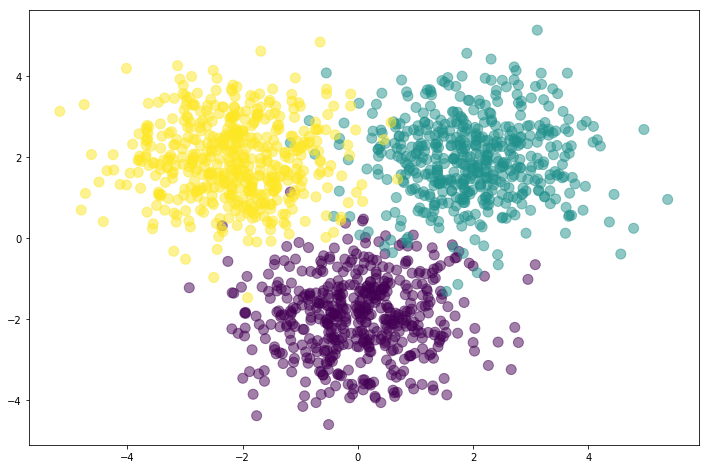

In [40]:
# Create 500 samples per class
Nclass = 500

# General Gaussian clouds, as well as labels
X1 = np.random.randn(Nclass, 2) + np.array([0,-2])      # centered at 0, -2
X2 = np.random.randn(Nclass, 2) + np.array([2,2])       # centered at 2, 2
X3 = np.random.randn(Nclass, 2) + np.array([-2,2])      # centered at -2, 2

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)      # our target labels

# Visualize data
X = np.vstack([X1, X2, X3])
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [48]:
# Set our D, M, K values, and initialize the weights
D = 2 # number of input dimensions
M = 3 # Hidden layer size
K = 3 # number of classes

W1 = np.random.randn(D, M)
b1 = np.random.randn(M)

W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

# Define softmax
def softmax(A):
  expA = np.exp(A)                              # exponentiate A
  Y = expA / expA.sum(axis=1, keepdims=True)    # divide each row of expA by the rows sum
  return Y

# Define the forward action of the neural network
def forward(X, W1, b1, W2, b2):
  Z = sigmoid(X.dot(W1) + b1)
  A = Z.dot(W2) + b2
  Y = softmax(A)
  return Y

# Define a function to calculate the classifcation rate
def classification_rate(Y, P):
  n_correct = 0 
  n_total = 0
  for i in range(len(Y)):
    n_total += 1
    if Y[i] == P[i]:
      n_correct += 1
  return float(n_correct) / n_total

In [49]:
# Calculate our probabilties
P_Y_given_X = forward(X, W1, b1, W2, b2)

In [50]:
# Get the prediction output class
P = np.argmax(P_Y_given_X, axis=1)
assert(len(P) == len(Y))

print("Classification rate for randomly chosen weights: ", classification_rate(Y, P))

Classification rate for randomly chosen weights:  0.3333333333333333


This classification rate is exactly as expected, 1/3. This is because the weights were randomly initialized, which should lead to the equivalent of a random guesss. 